# Chapter 5 - Modeling Market Risk

Risk is ubiquitous in finance, but is hard to quantify.

Market Risk is the risk arising from changes in financial indicators, such as exchange rate, inflation and so on.

When a single source of financial risk changes, other risk sources cannot stay constant. Financial indicatiors are interrelated.

"Considering the complexity of modern financial systems, it is unlikely that a reseracher will be able to uncover the ingredients of a theory by visual inspection of the data or by running a few regressions"

## Value at Risk (VaR)

VaR has two important characteristics:

- It provides a common consistent measure of risk across different positions and risk factors;

- It takes account of the correlations between different risk factors.

It answers the question: What is the maximum expected loss of my investment?

The components of VaR are a confidence interval, a time period, the value of an asset or portfolio, and the standard deviation.

- VaR needs an estimation of the probability of loss
- VaR concentrates on the potential losses (Loss projection)
- VaR has three key ingredients (Standard deviation that defines the level of loss, fixed time horizon over which risk is assessed, confidence interval)


### Variance-Covariance Method

Also know as the **parametric** method, because observations are assumed to be normally distributed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(10,6)

/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


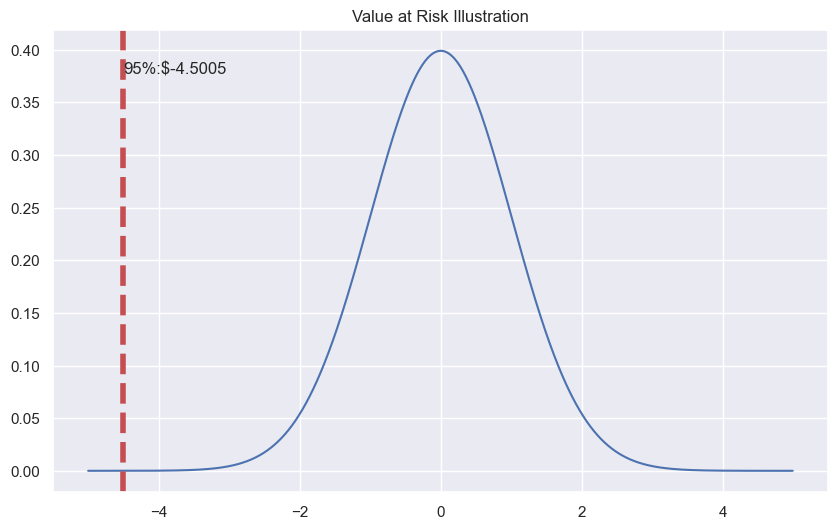

In [2]:
mean= 0
std_dev = 1
x = np.arange (-5,5,0.01)
y = norm.pdf(x, mean, std_dev)
pdf=plt.plot(x,y)
min_ylim, max_ylim = plt.ylim()
plt.text(np.percentile(x, 5), max_ylim * 0.9, "95%:${:.4f}".format(np.percentile(x,5)))
plt.axvline(np.percentile(x,5),color="r", linestyle="dashed", linewidth=4)
plt.title("Value at Risk Illustration")
plt.show()

Following Fama (1965), it was realized that stock price returns do not follow normal distribution due to fat tail and asymmetry. This empirical observation implies that stock returns have higher kurtosis than that of a normal distribution.

Having high kurtosis amounts to fat tail, and this is able to capture the extreme negative returns. As the variance-covariance method is unable to capture fat tail, it cannot, therefore, estimate extreme negative returns that are likely to occur.

$$ VaR = V \sigma_p \sqrt{t} Z_\alpha$$

$$ \sigma_p = \sqrt{w_1 ^2 \sigma_1 ^2 + w_2 ^2 \sigma_2 ^2 + \rho w_1 w_2 \sigma_1 \sigma_2}$$

$$ \sigma_p = \sqrt{w_1 \sigma_1 + w_2 + \sigma + 2w_1 w_2 \sum_{1,2}} $$

In [ ]:
def getDailyData(symbol):
    parameters = {"function": "TIME_SERIES_DAILY_ADJUSTED", "symbol": symbol, "outputsize": "full", "datatype": "csv", "apikey": ""}
    response = requests.get()